Step 2: Implementing the Minimax Algorithm...
Minimax algorithm implemented with Alpha-Beta Pruning.

Step 3: Creating the AI Player function...
AI Player function created. It uses Minimax to find the optimal move.

Step 4: Simulating games to evaluate AI performance...

Step 5: Displaying Simulation Results...
Simulating 50 games. AI (O) vs Random Agent (X). AI starts first: True
  Simulating game 5/50...
  Simulating game 10/50...
  Simulating game 15/50...
  Simulating game 20/50...
  Simulating game 25/50...
  Simulating game 30/50...
  Simulating game 35/50...
  Simulating game 40/50...
  Simulating game 45/50...
  Simulating game 50/50...
Simulating 50 games. AI (O) vs Random Agent (X). AI starts first: False
  Simulating game 5/50...
  Simulating game 10/50...
  Simulating game 15/50...
  Simulating game 20/50...
  Simulating game 25/50...
  Simulating game 30/50...
  Simulating game 35/50...
  Simulating game 40/50...
  Simulating game 45/50...
  Simulating game 50/50...

--- S

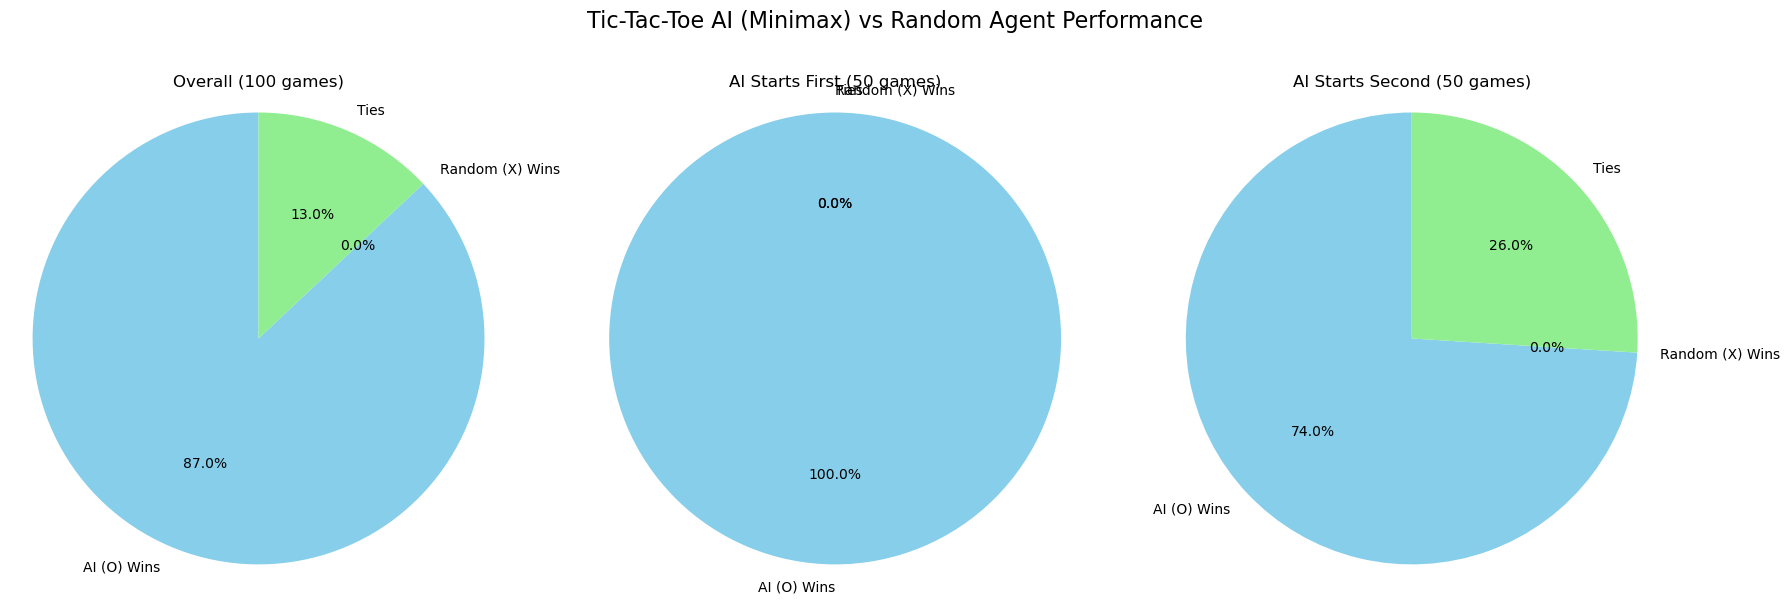

Performance evaluation charts displayed.


In [2]:
import random
import math
import time
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Game Environment Setup ---
EMPTY = ' '
AI_PLAYER = 'O'
HUMAN_PLAYER = 'X' # Or another AI for simulation

def print_board(board):
    """Prints the Tic-Tac-Toe board."""
    print("\n")
    print(f" {board[0]} | {board[1]} | {board[2]} ")
    print("---|---|---")
    print(f" {board[3]} | {board[4]} | {board[5]} ")
    print("---|---|---")
    print(f" {board[6]} | {board[7]} | {board[8]} ")
    print("\n")

def check_winner(board, player):
    """Checks if the given player has won."""
    win_conditions = [
        [0, 1, 2], [3, 4, 5], [6, 7, 8],  # Rows
        [0, 3, 6], [1, 4, 7], [2, 5, 8],  # Columns
        [0, 4, 8], [2, 4, 6]             # Diagonals
    ]
    for condition in win_conditions:
        if all(board[i] == player for i in condition):
            return True
    return False

def is_board_full(board):
    """Checks if the board is full (tie)."""
    return EMPTY not in board

def get_available_moves(board):
    """Returns a list of indices of available (empty) moves."""
    return [i for i, spot in enumerate(board) if spot == EMPTY]

def make_move(board, move, player):
    """Makes a move on the board. Returns a new board state."""
    if 0 <= move < 9 and board[move] == EMPTY:
        new_board = board[:] # Create a copy
        new_board[move] = player
        return new_board
    return None # Invalid move

# --- 2. Minimax Algorithm Implementation ---
print("Step 2: Implementing the Minimax Algorithm...")

memo = {} # For memoization (optional optimization, useful for deeper games)

def minimax(board, depth, is_maximizing_player, alpha, beta, ai_player_symbol, human_player_symbol):
    """
    Minimax algorithm with alpha-beta pruning.
    - board: current state of the board
    - depth: current depth in the game tree (not strictly needed for TTT but good for general minimax)
    - is_maximizing_player: boolean, True if current move is for AI (maximizer), False for opponent (minimizer)
    - alpha: best value found so far for maximizer
    - beta: best value found so far for minimizer
    - ai_player_symbol: 'X' or 'O'
    - human_player_symbol: 'X' or 'O'
    """
    board_tuple = tuple(board) # Use tuple for memoization key
    if board_tuple in memo:
        return memo[board_tuple]

    # Terminal states
    if check_winner(board, ai_player_symbol):
        return 10 - depth # AI wins, prioritize faster wins
    if check_winner(board, human_player_symbol):
        return depth - 10 # Opponent wins, prioritize delaying losses
    if is_board_full(board):
        return 0 # Tie

    available_moves = get_available_moves(board)

    if is_maximizing_player: # AI's turn (Maximizer)
        max_eval = -math.inf
        for move_idx in available_moves:
            new_board = make_move(board, move_idx, ai_player_symbol)
            eval_score = minimax(new_board, depth + 1, False, alpha, beta, ai_player_symbol, human_player_symbol)
            max_eval = max(max_eval, eval_score)
            alpha = max(alpha, eval_score)
            if beta <= alpha:
                break # Beta cut-off
        memo[board_tuple] = max_eval
        return max_eval
    else: # Opponent's turn (Minimizer)
        min_eval = math.inf
        for move_idx in available_moves:
            new_board = make_move(board, move_idx, human_player_symbol)
            eval_score = minimax(new_board, depth + 1, True, alpha, beta, ai_player_symbol, human_player_symbol)
            min_eval = min(min_eval, eval_score)
            beta = min(beta, eval_score)
            if beta <= alpha:
                break # Alpha cut-off
        memo[board_tuple] = min_eval
        return min_eval

print("Minimax algorithm implemented with Alpha-Beta Pruning.\n")

# --- 3. AI Player Function ---
print("Step 3: Creating the AI Player function...")

def find_best_move(board, ai_player_symbol, human_player_symbol):
    """
    Finds the best move for the AI player using Minimax.
    """
    best_score = -math.inf
    best_move = -1
    available_moves = get_available_moves(board)

    # Shuffle available moves to add some variability if multiple moves have the same best score
    # This makes the AI less predictable if there are several equally good optimal moves.
    random.shuffle(available_moves)

    for move_idx in available_moves:
        new_board = make_move(board, move_idx, ai_player_symbol)
        memo.clear() # Clear memo for each top-level move evaluation if desired, or keep for session
        move_score = minimax(new_board, 0, False, -math.inf, math.inf, ai_player_symbol, human_player_symbol)

        if move_score > best_score:
            best_score = move_score
            best_move = move_idx
            
    # Fallback: if somehow no move is found (should not happen with Minimax on non-terminal board)
    # or if all moves lead to a loss, pick a random available one.
    # Minimax should always find a move unless the board is full or game over.
    if best_move == -1 and available_moves:
        print("Warning: Minimax couldn't determine a best move decisively, picking random from available.")
        return random.choice(available_moves)
        
    return best_move

print("AI Player function created. It uses Minimax to find the optimal move.\n")

# --- 4. Simulating Games ---
print("Step 4: Simulating games to evaluate AI performance...")

def random_move_agent(board, player_symbol):
    """A simple agent that makes a random valid move."""
    available_moves = get_available_moves(board)
    if available_moves:
        return random.choice(available_moves)
    return -1 # Should not happen if game ends properly

def simulate_games(num_games, ai_starts_first, ai_player_char='O', opponent_char='X'):
    """
    Simulates a number of games between Minimax AI and a Random Agent.
    Returns statistics: (ai_wins, opponent_wins, ties)
    """
    ai_wins = 0
    opponent_wins = 0
    ties = 0
    
    print(f"Simulating {num_games} games. AI ({ai_player_char}) vs Random Agent ({opponent_char}). AI starts first: {ai_starts_first}")

    for i in range(num_games):
        board = [EMPTY] * 9
        current_player_is_ai = ai_starts_first
        game_over = False
        
        if (i + 1) % (num_games // 10 if num_games >=10 else 1) == 0:
            print(f"  Simulating game {i+1}/{num_games}...")

        while not game_over:
            if current_player_is_ai:
                move = find_best_move(board, ai_player_char, opponent_char)
                board = make_move(board, move, ai_player_char)
                if check_winner(board, ai_player_char):
                    ai_wins += 1
                    game_over = True
                # print_board(board) # Optional: print board during simulation
            else: # Opponent's turn (Random Agent)
                move = random_move_agent(board, opponent_char)
                if move != -1:
                    board = make_move(board, move, opponent_char)
                    if check_winner(board, opponent_char):
                        opponent_wins += 1
                        game_over = True
                # print_board(board) # Optional: print board during simulation

            if not game_over and is_board_full(board):
                ties += 1
                game_over = True
            
            current_player_is_ai = not current_player_is_ai
            
    return ai_wins, opponent_wins, ties

# --- 5. Displaying Progress & Results ---
print("\nStep 5: Displaying Simulation Results...")

# Parameters for simulation
NUM_SIMULATIONS = 100 # Keep this moderate for speed, Minimax is computationally intensive
AI_PLAYER_SYMBOL = 'O'
RANDOM_AGENT_SYMBOL = 'X'

# Simulate AI starting first
ai_wins_first, opp_wins_first, ties_first = simulate_games(NUM_SIMULATIONS // 2, True, AI_PLAYER_SYMBOL, RANDOM_AGENT_SYMBOL)

# Simulate AI starting second
ai_wins_second, opp_wins_second, ties_second = simulate_games(NUM_SIMULATIONS // 2, False, AI_PLAYER_SYMBOL, RANDOM_AGENT_SYMBOL)

total_ai_wins = ai_wins_first + ai_wins_second
total_opp_wins = opp_wins_first + opp_wins_second
total_ties = ties_first + ties_second
total_games = NUM_SIMULATIONS

print("\n--- Simulation Results ---")
print(f"Total Games Played: {total_games}")
print(f"AI ({AI_PLAYER_SYMBOL}) Wins: {total_ai_wins} ({total_ai_wins/total_games*100:.2f}%)")
print(f"Random Agent ({RANDOM_AGENT_SYMBOL}) Wins: {total_opp_wins} ({total_opp_wins/total_games*100:.2f}%)")
print(f"Ties: {total_ties} ({total_ties/total_games*100:.2f}%)")

# "Accuracy" for Minimax AI:
# Against a random opponent, a perfect Minimax AI should win or draw every game.
# It should never lose to a random agent if implemented correctly.
# So, "accuracy" can be defined as (AI Wins + Ties) / Total Games
if total_games > 0:
    accuracy = (total_ai_wins + total_ties) / total_games
    print(f"\nMinimax AI 'Unbeatability' (Wins + Ties vs Random): {accuracy*100:.2f}%")
    if total_opp_wins > 0:
        print("WARNING: Minimax AI lost to a random agent. This might indicate an issue in the Minimax logic or a very unlikely scenario if moves are not perfectly deterministic (e.g. random choice among equal scores).")
else:
    print("No games simulated to calculate accuracy.")


# Charting the results
labels = [f'AI ({AI_PLAYER_SYMBOL}) Wins', f'Random ({RANDOM_AGENT_SYMBOL}) Wins', 'Ties']
sizes_total = [total_ai_wins, total_opp_wins, total_ties]
sizes_ai_first = [ai_wins_first, opp_wins_first, ties_first]
sizes_ai_second = [ai_wins_second, opp_wins_second, ties_second]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Tic-Tac-Toe AI (Minimax) vs Random Agent Performance', fontsize=16)

# Total
axs[0].pie(sizes_total, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
axs[0].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title(f'Overall ({total_games} games)')

# AI Starts First
axs[1].pie(sizes_ai_first, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
axs[1].axis('equal')
axs[1].set_title(f'AI Starts First ({NUM_SIMULATIONS // 2} games)')

# AI Starts Second
axs[2].pie(sizes_ai_second, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
axs[2].axis('equal')
axs[2].set_title(f'AI Starts Second ({NUM_SIMULATIONS // 2} games)')

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle
print("\nDisplaying performance charts...")
plt.show()

print("Performance evaluation charts displayed.")

